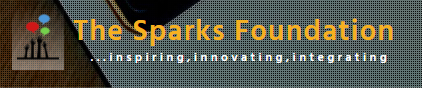

## A GRIPNOV2021 Task#2 submission by Supriya Raturi

## Topic : Prediction using Unupervised ML

**Problem Statement:**
From the *IRIS* dataset predict the optimal number of clusters and represent them visually.

In [80]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [81]:
# Load the dataset
df1 = sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
# Shape of the data
df1.shape

(150, 5)

In [83]:
# Informational summary
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Observation:**
1. All features are numeric types
2. None of the features contains null values.

In [84]:
# Descriptive summary
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [85]:
df1['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

**Inference:**
1. All the 3 species are equally distributed comprising of 50 records.

## Exploratory data analysis

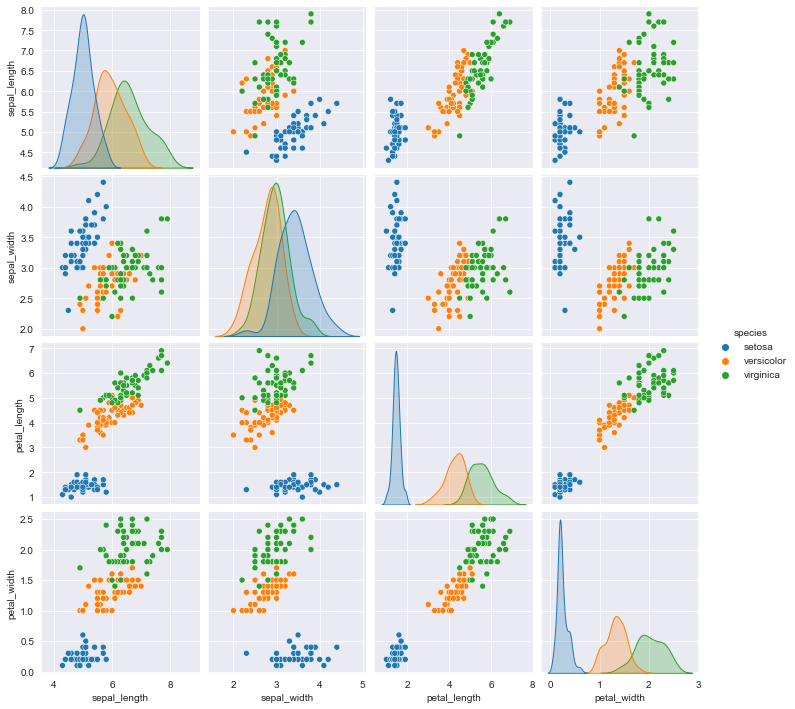

In [86]:
# Visualization using pairplot
sns.pairplot(df, diag_kind='kde',hue='species');

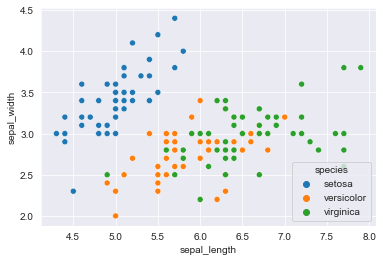

In [87]:
# Scatter plot between sepal_length and sepal_width
sns.scatterplot(df1['sepal_length'],df['sepal_width'],hue=df1['species']);

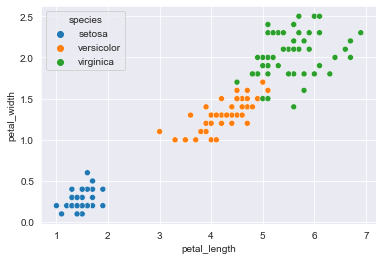

In [88]:
# Scatter plot between petal_length and petal_width
sns.scatterplot(df1['petal_length'],df['petal_width'],hue=df1['species']);

**Inference:**
1. From the two scatterplot we can see that SETOSA can be easily identified from the 3 species as it has smaller petal width and petal length also smaller sepal length and greater sepal width.
2. Versicolor and Virgina are bit tricky to identify as they have similar sepal width and sepal length.

## Model Building

In [89]:
#drop 'species' column
df2 = df.drop(['species'],axis=1)
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


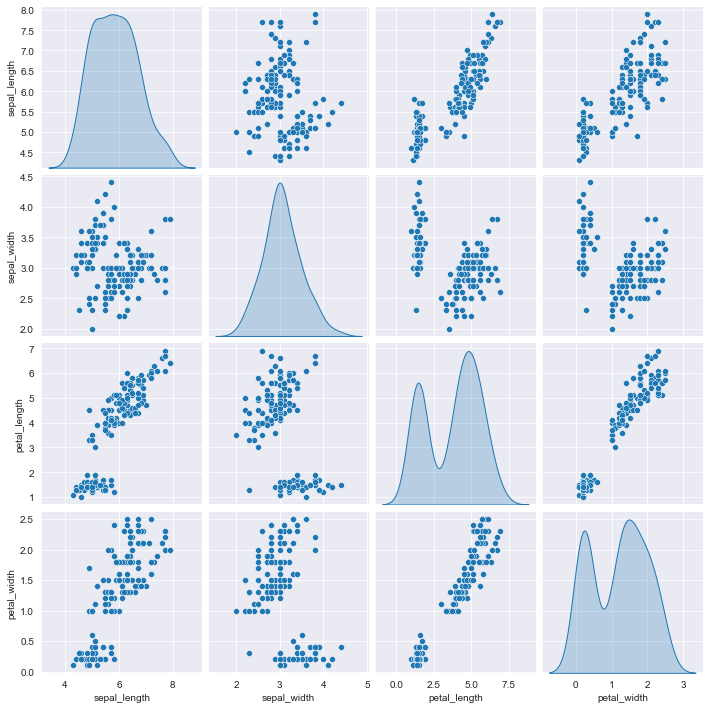

In [90]:
sns.pairplot(df, diag_kind='kde');

**Inference:**
1. From the pairplot we can see 2 peaks hence there will be atleast 2 cluster formation.   

In [91]:
# Finding optimal cluster size for KMeans
# Calculating MSE for various cluster sizes

n_clusters = range(1,10,1)
mse = []

for i in n_clusters:
    km1 = KMeans(n_clusters=i)
    km_model1 = km1.fit(df2)
    error = km_model1.inertia_
    
    mse.append(error)
    
df_inertia = pd.DataFrame({'No of clusters':n_clusters,'Inertia':mse})
df_inertia

,No of clusters,Inertia
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.256009
4,5,46.472230
5,6,39.039987
6,7,34.409010
7,8,30.186555
8,9,28.023494


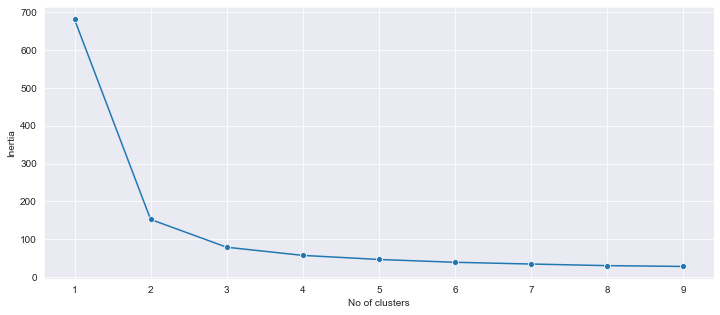

In [92]:
# Plotting the df_inertia 
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
sns.lineplot(df_inertia['No of clusters'],df_inertia['Inertia'],marker='o')
plt.show()

**Inference:**
1. The optimum clusters is where the elbow occurs hence n = 3

In [100]:
# Building Kmeans model using n= 3 

km2 = KMeans(n_clusters=3)

km2_model = km2.fit(df2)
y_pred = km2_model.predict(df2)

In [101]:
# Creatig a new colum called 'group' which stores the value of cluster label in df2 dataframe 

df2['label'] = y_pred
df2['label'].value_counts()

0    62
1    50
2    38
Name: label, dtype: int64

**Observation:**
* We had 3 distinct species with 50 records each, although we are able to build 3 clusters but value counts of label grerated by machine shows a different value.

**Lets see which label indicates which species using pairplot -**

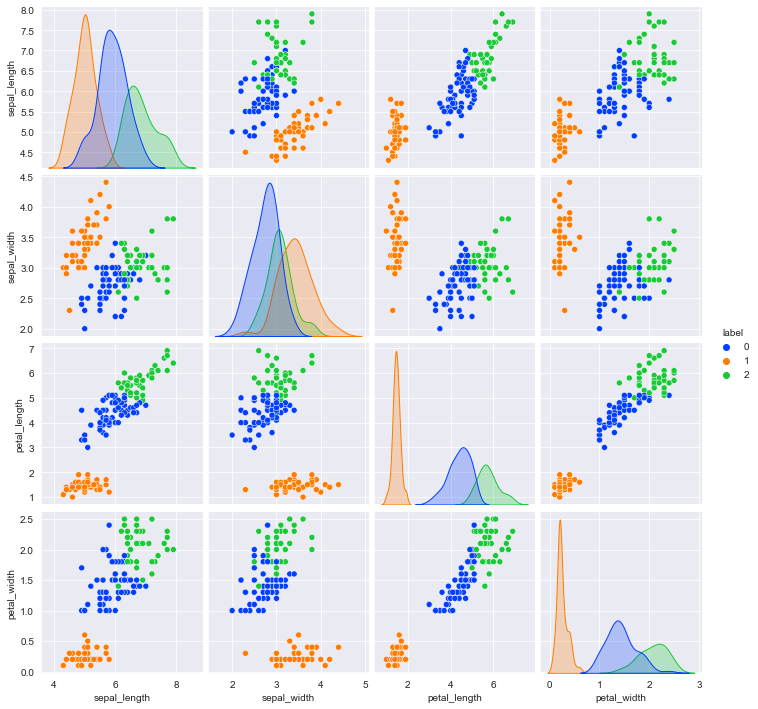

In [102]:
# Pairplot of dataframe df2
sns.pairplot(df2, diag_kind='kde',hue='label',palette = 'bright');

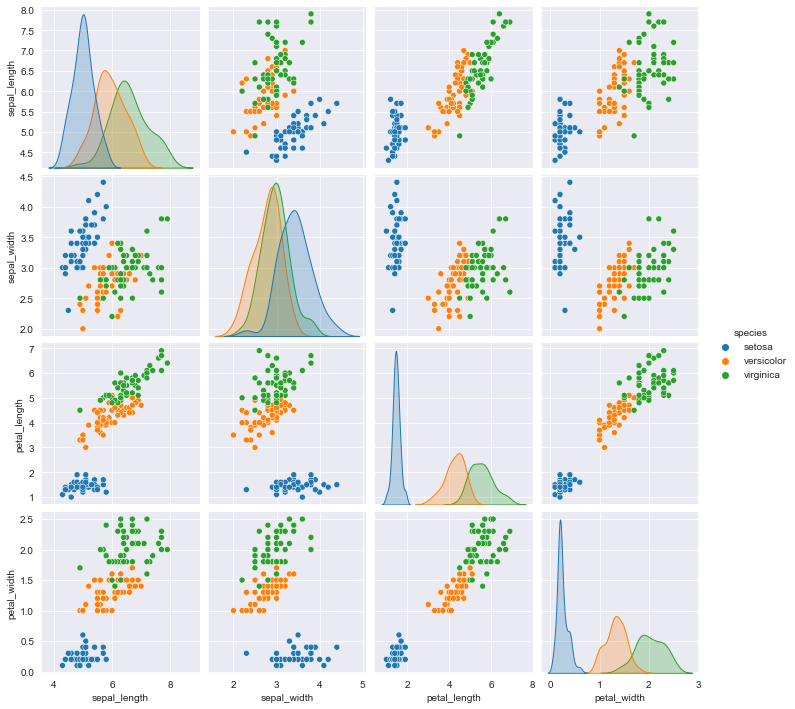

In [96]:
# Pairplot of dataframe df1
sns.pairplot(df1, diag_kind='kde',hue='species');

**Observation:**

By carefully studyig the pairplot we can say,
* Label 0 - Versicolor
* Label 1 - Setosa
* Label 2 - Virginica

Hence we are able to identify SETOSA properly just as we thought.

**Plotting the clusters on first two features**

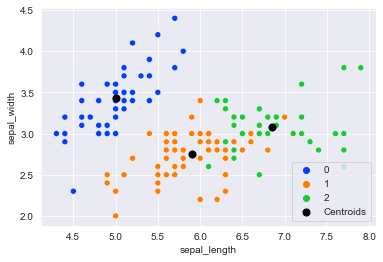

In [97]:
# Scatter plot between sepal_length and sepal_width
sns.scatterplot(df2['sepal_length'],df2['sepal_width'],hue=df2['label'],palette = 'bright');
plt.scatter(km2_model.cluster_centers_[:, 0], km2_model.cluster_centers_[:,1], 
            s = 50, c = 'black', label = 'Centroids')

plt.legend()